In [1]:
import pandas as pd
import numpy as np

import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('datasets/creditcard.csv')

In [5]:
dataset['hour'] = dataset['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
dataset.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


In [6]:
def PlotHistogram(df,norm):
    bins = np.arange(df['hour'].min(),df['hour'].max()+2)
    plt.figure(figsize=(15,4))
    sns.distplot(df[df['Class']==0.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='b',
                 hist_kws={'alpha':.5},
                 label='Legit')
    sns.distplot(df[df['Class']==1.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='r',
                 label='Fraud',
                 hist_kws={'alpha':.5})
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()

Normalized histogram of Legit/Fraud over hour of the day


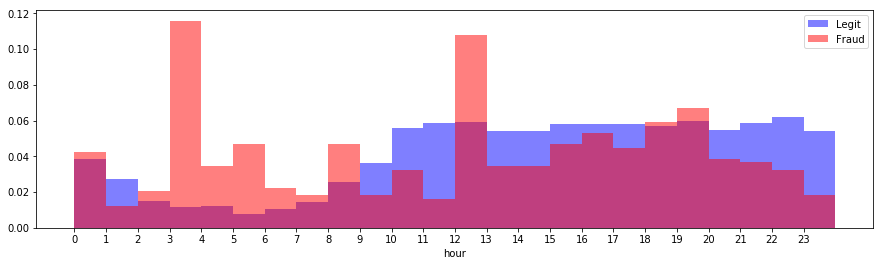

Counts histogram of Legit/Fraud over hour of the day
*you can barely see the Fraud cases since there are so little of them.


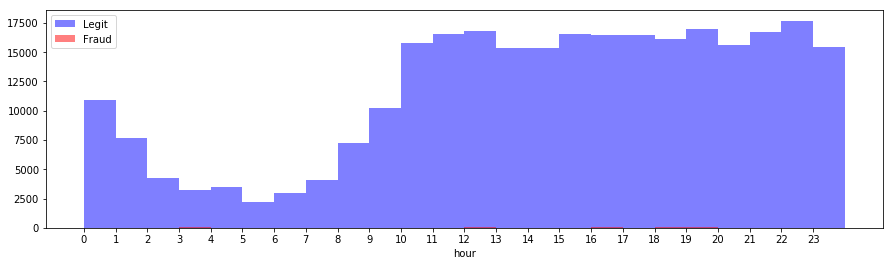

0.7534158229827881


In [8]:
start = time.time()
print('Normalized histogram of Legit/Fraud over hour of the day')
PlotHistogram(dataset,True)
print('Counts histogram of Legit/Fraud over hour of the day')
print('*you can barely see the Fraud cases since there are so little of them.')
PlotHistogram(dataset,False)
print(time.time()-start)